<a href="https://colab.research.google.com/github/alortiz05/DDDS-Cohort-16-Projects/blob/main/Model_3M_IMBD_Final_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [ ]:
pip install imdbpy

In [ ]:
pip install tabulate

In [ ]:
pip install tensorflow

In [ ]:
from imdb import IMDb

Read the parquet file created previously

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df3M = pd.read_parquet("/content/drive/MyDrive/Capstone Project/imdb_ml_data3M.parquet")
df3M.head(100)

,tconst,originalTitle,runtimeMinutes,genre,category,averageRating,region,primaryName,primaryProfessionSplit,knownForTitleSplit
0,tt0000009,Miss Jerry,45,Romance,actress,5.4,DE,William Courtenay,actor,tt0000009
1,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
2,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
3,tt0000009,Miss Jerry,45,Romance,director,5.4,DE,William Courtenay,actor,tt0000009
4,tt0000009,Miss Jerry,45,Romance,writer,5.4,DE,William Courtenay,actor,tt0000009
...,...,...,...,...,...,...,...,...,...,...
95,tt0000574,The Story of the Kelly Gang,70,Adventure,actor,6.0,RS,Sam Crewes,art_department,tt0000574
96,tt0000574,The Story of the Kelly Gang,70,Adventure,actress,6.0,RS,Sam Crewes,art_department,tt0000574
97,tt0000574,The Story of the Kelly Gang,70,Adventure,actor,6.0,RS,Sam Crewes,art_department,tt0000574
98,tt0000574,The Story of the Kelly Gang,70,Adventure,actor,6.0,RS,Sam Crewes,art_department,tt0000574


df1M_no_movie = df1M[~df1M['titleType'].str.contains('movie', case=False, na=False)]
#This will make sure that we are using Movies only

In [ ]:
df3M.head()

,tconst,originalTitle,runtimeMinutes,genre,category,averageRating,region,primaryName,primaryProfessionSplit,knownForTitleSplit
0,tt0000009,Miss Jerry,45,Romance,actress,5.4,DE,William Courtenay,actor,tt0000009
1,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
2,tt0000009,Miss Jerry,45,Romance,actor,5.4,DE,William Courtenay,actor,tt0000009
3,tt0000009,Miss Jerry,45,Romance,director,5.4,DE,William Courtenay,actor,tt0000009
4,tt0000009,Miss Jerry,45,Romance,writer,5.4,DE,William Courtenay,actor,tt0000009


In [ ]:
unique_values = df3M['originalTitle'].unique()
unique_values.tolist() #this was to get a small list of the Unique titls to pull one for testing. i.e. Robinhood


['Miss Jerry',
 'The Corbett-Fitzsimmons Fight',
 'Bohemios',
 'The Story of the Kelly Gang',
 "L'enfant prodigue",
 'Robbery Under Arms',
 'Amleto',
 'The Fairylogue and Radio-Plays',
 'The King of Kings',
 'The King of the Jungle',
 "The King's Highway",
 'Konets Sankt-Peterburga',
 'The Lady in Ermine',
 'The Last Outlaw',
 'The Last Trail',
 'Laster der Menschheit',
 'Die Liebe der Jeanne Ney',
 'Lightning',
 'Loco Luck',
 'London After Midnight',
 'The Love Mart',
 "Love's Greatest Mistake",
 'Loves of Carmen',
 'Luis Pardo',
 'The Lunatic at Large',
 'Madame besøker Oslo',
 'The Magic Flame',
 'Man Crazy',
 "A Man's Past",
 'Man, Woman and Sin',
 'Marquitta',
 'The Masked Menace',
 'Der Meister von Nürnberg',
 'Melting Millions',
 'A Million Bid',
 'Million Dollar Mystery',
 'The Missing Link',
 'Mockery',
 'The Monkey Talks',
 'Morgane la sirène',
 'Moskva',
 'Moskva v oktyabre',
 'La moza del cántaro',
 'Mr. Wu',
 'My Best Girl',
 'My Friend from India',
 'Le mystère de la tour

In [ ]:
filtered_df3M = df3M[df3M['originalTitle'] == 'Spellbound']
filtered_df3M.drop(columns=['averageRating'])

,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit


In [ ]:
filtered_df3M = df3M[df3M['originalTitle'] == 'Robin Hood']
filtered_df3M.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
449634,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449635,tt0003337,Robin Hood,<NA>,Adventure,actress,GB,William Russell,producer,tt0003337
449636,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449637,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
449638,tt0003337,Robin Hood,<NA>,Adventure,actor,GB,William Russell,producer,tt0003337
...,...,...,...,...,...,...,...,...,...
486199,tt0003337,Robin Hood,<NA>,Adventure,actor,None,Mignon Anderson,actress,tt0003337
486200,tt0003337,Robin Hood,<NA>,Adventure,actor,None,Mignon Anderson,actress,tt0003337
486201,tt0003337,Robin Hood,<NA>,Adventure,director,None,Mignon Anderson,actress,tt0003337
486202,tt0003337,Robin Hood,<NA>,Adventure,writer,None,Mignon Anderson,actress,tt0003337


In [ ]:
filtered_df3M2 = df3M[df3M['originalTitle'] == 'The Ring']
filtered_df3M2.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
1162956,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162957,tt0018328,The Ring,89,Sport,actress,FR,Carl Brisson,archive_footage,tt0018328
1162958,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162959,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162960,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
...,...,...,...,...,...,...,...,...,...
1516335,tt0018328,The Ring,89,Drama,actress,None,Lillian Hall-Davis,actress,tt0018328
1516336,tt0018328,The Ring,89,Drama,actor,None,Lillian Hall-Davis,actress,tt0018328
1516337,tt0018328,The Ring,89,Drama,director,None,Lillian Hall-Davis,actress,tt0018328
1516338,tt0018328,The Ring,89,Drama,writer,None,Lillian Hall-Davis,actress,tt0018328


In [ ]:
df3M_remaining = pd.concat([df3M, filtered_df3M]).drop_duplicates(keep=False)

#DF Preprocessing for Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras import layers
import numpy as np

# Drop rows with missing target
df3M_clean = df3M_remaining.dropna(subset=["averageRating","runtimeMinutes"])

# Select features and target
X = df3M_clean[["originalTitle", "runtimeMinutes", "genre","region", "primaryName"]]
y = df3M_clean["averageRating"]

# Define column types
categorical_cols = ["originalTitle", "genre", "region", "primaryName"]
numeric_cols = ["runtimeMinutes"]

# Build preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit & transform the data
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

# Convert to dense arrays if needed
X_train_proc = X_train_proc.toarray() if hasattr(X_train_proc, "toarray") else X_train_proc
X_test_proc = X_test_proc.toarray() if hasattr(X_test_proc, "toarray") else X_test_proc


#Feature Importance using XG

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Load your dataframe (already preprocessed & saved)
df = pd.read_parquet("/content/drive/MyDrive/Capstone Project/imdb_ml_data3M.parquet")

# ✅ Step 1: Filter down and drop rows with missing target
df = df[df['averageRating'].notna()]
df = df.sample(n=300_000, random_state=42)  # ✅ Reduced sample size for speed

# ✅ Step 2: Reduce cardinality for high-cardinality columns
def reduce_cardinality(col, top_n=100):
    top = col.value_counts().nlargest(top_n).index
    return col.apply(lambda x: x if x in top else 'Other')

df['primaryName'] = reduce_cardinality(df['primaryName'], top_n=100)
df['originalTitle'] = reduce_cardinality(df['originalTitle'], top_n=100)
df['tconst'] = reduce_cardinality(df['tconst'], top_n=100)

# ✅ Step 3: Define features and target
features = ['runtimeMinutes', 'genre', 'originalTitle', 'primaryName']
target = 'averageRating'

X = df[features]
y = df[target]

# ✅ Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 5: Preprocessing
categorical = [ 'genre', 'originalTitle', 'primaryName']
numerical = ['runtimeMinutes']

preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='mean'), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical)
])

# ✅ Step 6: Modeling pipeline using XGBoost
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        tree_method='auto',  # Use 'gpu_hist' if GPU available
        n_jobs=-1,
        random_state=42
    ))
])

# ✅ Step 7: Fit the model
model.fit(X_train, y_train)

# ✅ Step 8: Predict and evaluate
y_pred = model.predict(X_test)
print("✅ RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("✅ R^2 Score:", r2_score(y_test, y_pred))



✅ RMSE: 0.4375549985086106
✅ R^2 Score: 0.8272670877962872


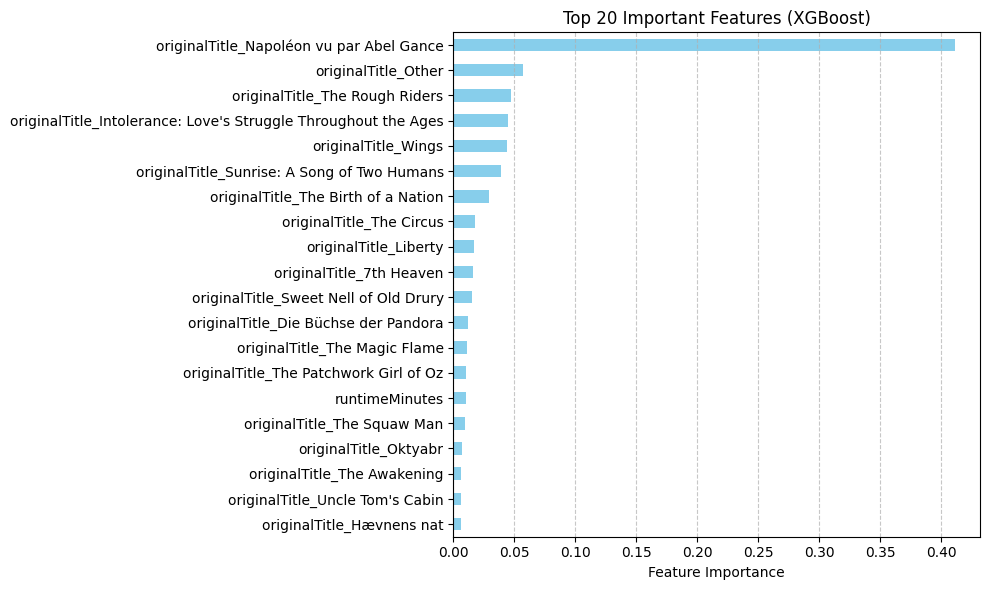

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Get the trained model and preprocessor
xgb_model = model.named_steps['regressor']
preprocessor = model.named_steps['preprocessor']

# Step 2: Get feature names from ColumnTransformer
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical)
all_features = np.concatenate([numerical, cat_features])

# Step 3: Get feature importances from XGBoost
importances = xgb_model.feature_importances_

# Step 4: Create Series and sort
feat_importances = pd.Series(importances, index=all_features)
feat_importances_sorted = feat_importances.sort_values(ascending=False)

# Step 5: Plot
top_n = 20
top_features = feat_importances_sorted.head(top_n)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features (XGBoost)")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Seaborn better Style :)

/tmp/ipython-input-19-461763131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_d')


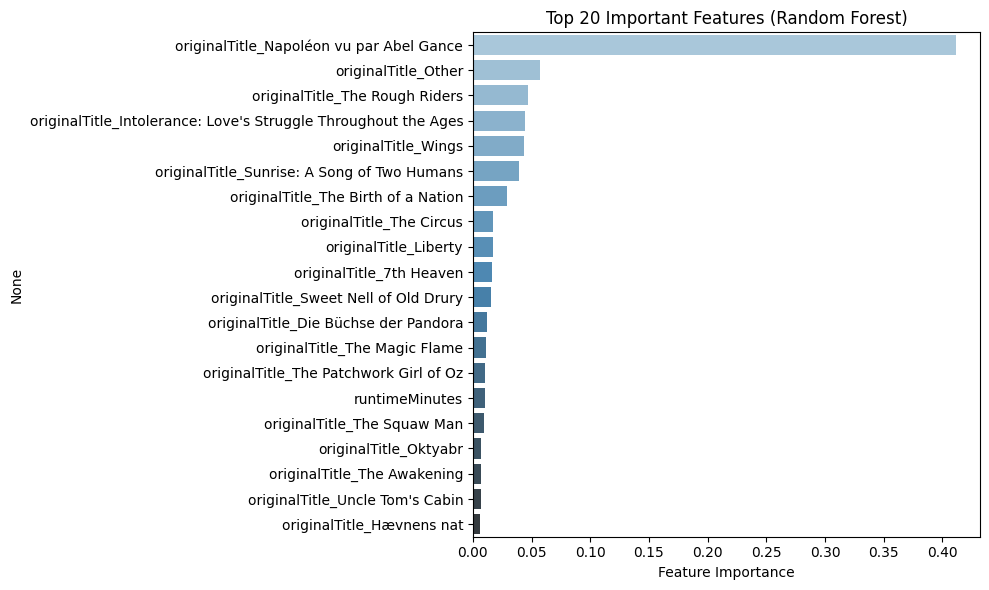

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='Blues_d')
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features (Random Forest)")
plt.tight_layout()
plt.show()

#Build and Train the Keras Model

In [ ]:
model = keras.Sequential([ #unoptimized model
    layers.Dense(32, activation="gelu", input_shape=(X_train_proc.shape[1],)), #number of neurons common options 64,128,256,512, think of a neuron as a detector, they stack to detect increasing complex pattterns
    layers.Dense(32, activation="gelu"), #try GELU  for a smoother version of ReLU
    layers.Dense(1)  # Predicting a continuous value (rating)
])

model.compile(optimizer="AdamW", loss="mse", metrics=["mae"]) #Try RMSProp scales learning rate by moving avg good for RNNs, AdamW variant of Adam with eeigh decay, and better for generalization

# Train the model
history = model.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), epochs=10, batch_size=32) #of epochs are the passes through the training data, number of samples before updating weights smaller more genralized and noisy larger could over fit.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = keras.Sequential([ #Optimized model
    layers.Dense(256, activation="gelu", input_shape=(X_train_proc.shape[1],)), #number of neurons common options 64,128,256,512, think of a neuron as a detector, they stack to detect increasing complex pattterns
    layers.Dense(64, activation="gelu"), #try GELU  for a smoother version of ReLU
    layers.Dense(1)  # Predicting a continuous value (rating)
])

model.compile(optimizer="AdamW", loss="mse", metrics=["mae"]) #Try RMSProp scales learning rate by moving avg good for RNNs, AdamW variant of Adam with eeigh decay, and better for generalization
#model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0), loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train_proc, y_train, validation_data=(X_test_proc, y_test), epochs=50, batch_size=128) #of epochs are the passes through the training data, number of samples before updating weights smaller more genralized and noisy larger could over fit.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.save("my_3Mmodel.keras")

NameError: name 'model' is not defined

Predicted vs. True Values

- Check how well predictions align with actual targets.

2087/2087 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


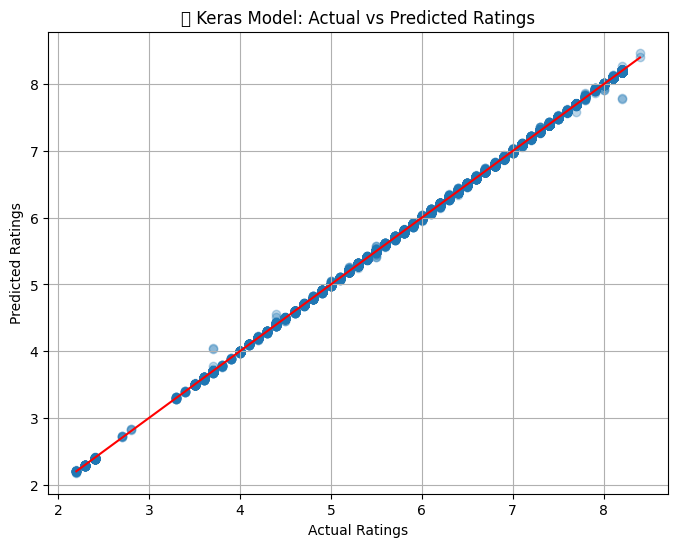

In [ ]:
# Predict ratings
y_pred = model.predict(X_test_proc).flatten()

# Optional: Compare predictions to actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("🎬 Keras Model: Actual vs Predicted Ratings")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

#Visualizations

plot a bar graph comparing actual vs predicted ratings for the top 20 movies

2087/2087 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


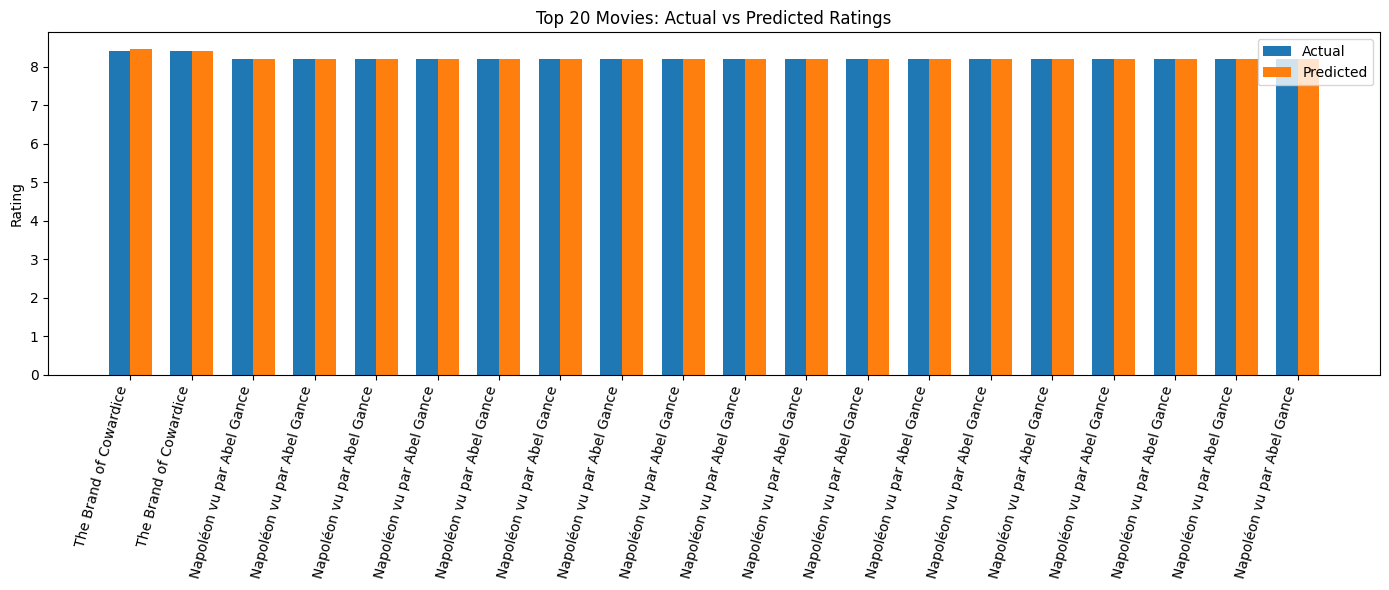

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Predict ratings
y_pred = model.predict(X_test_proc)

# Step 2: Create DataFrame with actual and predicted ratings
results_df = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_pred.flatten()
})

# Optional: Include movie titles (if available in X_test)
# If X_test is a DataFrame and contains titles
if 'originalTitle' in X_test.columns:
    results_df['title'] = X_test['originalTitle'].values
else:
    results_df['title'] = [f'Movie {i}' for i in range(len(results_df))]

# Step 3: Get top 20 by actual rating
top20 = results_df.sort_values(by='actual', ascending=False).head(20)

# Step 4: Plot actual vs predicted
x = np.arange(len(top20))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(14, 6))
bar1 = ax.bar(x - width/2, top20['actual'], width, label='Actual')
bar2 = ax.bar(x + width/2, top20['predicted'], width, label='Predicted')

# Add labels and titles
ax.set_ylabel('Rating')
ax.set_title('Top 20 Movies: Actual vs Predicted Ratings')
ax.set_xticks(x)
ax.set_xticklabels(top20['title'], rotation=75, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Loss & MAE Curves (Over Epochs)

- See if the model is overfitting, underfitting, or training well.

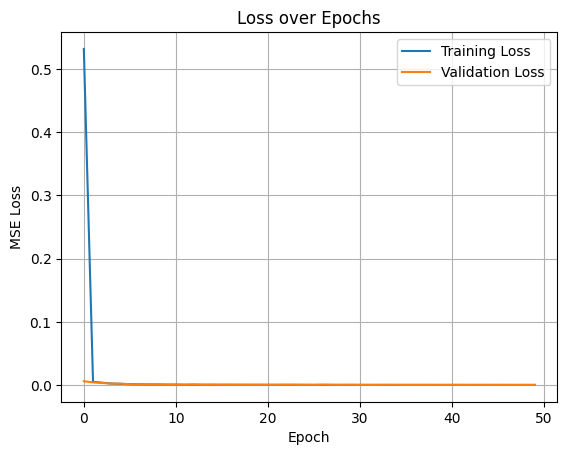

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract history
history_dict = history.history
# Create DataFrame
metrics_df3M = pd.DataFrame({
    'Epoch': range(1, len(history_dict['loss']) + 1),
    'Train Loss': history_dict['loss'],
    'Val Loss': history_dict['val_loss'],
    'Train MAE': history_dict['mae'],
    'Val MAE': history_dict['val_mae']
})

# Print table
print(metrics_df3M.head(10))  # or .tail(), or .to_string() for full view

   Epoch  Train Loss  Val Loss  Train MAE   Val MAE
0      1    0.532020  0.005867   0.145625  0.036404
1      2    0.004957  0.004090   0.036413  0.035004
2      3    0.003520  0.003140   0.037569  0.037868
3      4    0.002203  0.002185   0.031076  0.032727
4      5    0.001742  0.002066   0.027866  0.035354
5      6    0.001253  0.000976   0.023646  0.018698
6      7    0.001005  0.000920   0.021231  0.019989
7      8    0.000793  0.000790   0.018969  0.019873
8      9    0.000702  0.000855   0.017799  0.020261
9     10    0.000579  0.000453   0.016260  0.012943


My Training MSE= .000579, My Validation MSE= .000453

In [ ]:
import numpy as np

val_mse = 0.000453
val_rmse = np.sqrt(val_mse)
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0213


Residuals Plot (Prediction Error)

- helps to spot bias, heteroskedasticity, or other modeling problems.
- x-axis: your model’s predicted values
- y-axis: the residuals, which are true - predicted

In [ ]:
residuals = y_test.values - y_pred.flatten()

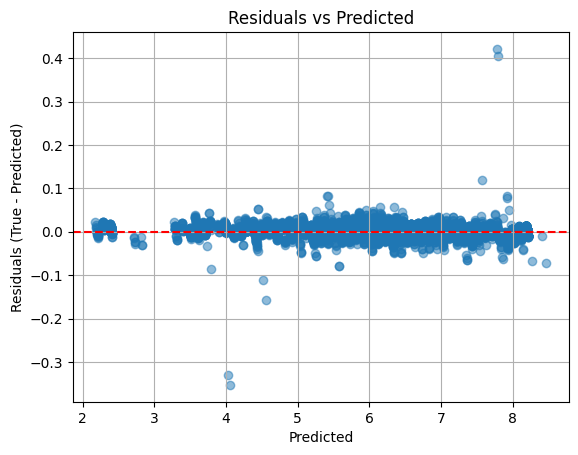

In [ ]:
#residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals (True - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

Conclusion: The Residuals hover aroung y=0 but many are below it. This could suggest no over/under-prediction. But the fact it is below 0 suggest the model might by over/underpredicting.

In [ ]:
y_pred = model.predict(X_test_proc)

2087/2087 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
y_pred = y_pred.flatten()

Mean residual: 0.0018316671794771275
Mean true value: 6.834139072351769
Mean predicted: 6.8323073


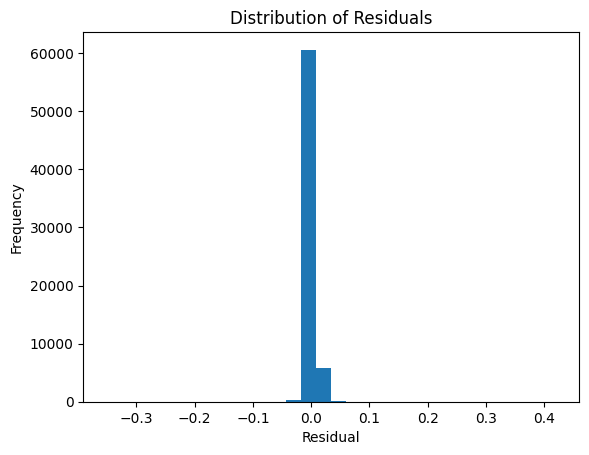

In [ ]:
print("Mean residual:", (y_test - y_pred).mean())
print("Mean true value:", y_test.mean())
print("Mean predicted:", y_pred.mean())
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

The model prediction is often .01 off the true

ROC Curve (One vs All)

#Testing Predictions

Use the extracted Robin Hood Data to test

In [ ]:
loaded_model = keras.models.load_model("/content/drive/MyDrive/Capstone Project/my_2Mmodel.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [ ]:
filtered_df3M2 = df3M[df3M['originalTitle'] == 'The Ring']
filtered_df3M2.drop(columns=['averageRating']) #removing the rating column before using it to rest the model.


,tconst,originalTitle,runtimeMinutes,genre,category,region,primaryName,primaryProfessionSplit,knownForTitleSplit
1162956,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162957,tt0018328,The Ring,89,Sport,actress,FR,Carl Brisson,archive_footage,tt0018328
1162958,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162959,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
1162960,tt0018328,The Ring,89,Sport,actor,FR,Carl Brisson,archive_footage,tt0018328
...,...,...,...,...,...,...,...,...,...
1516335,tt0018328,The Ring,89,Drama,actress,None,Lillian Hall-Davis,actress,tt0018328
1516336,tt0018328,The Ring,89,Drama,actor,None,Lillian Hall-Davis,actress,tt0018328
1516337,tt0018328,The Ring,89,Drama,director,None,Lillian Hall-Davis,actress,tt0018328
1516338,tt0018328,The Ring,89,Drama,writer,None,Lillian Hall-Davis,actress,tt0018328


In [ ]:
new_movie_TheRing3M = filtered_df3M2[["originalTitle", "runtimeMinutes", "genre", "region", "primaryName"]]

new_movie_proc3M= preprocessor.transform(new_movie_TheRing3M)
rating_pred3M = model.predict(new_movie_proc3M)

print(f"🎬 Predicted rating: {rating_pred3M[0][0]:.2f}")

362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
🎬 Predicted rating: 6.10


This is a perfect prediction!!

Webscrape to get new movie data

In [ ]:
import pandas as pd

# Create IMDb access object
ia = IMDb()

# Search for a movie
movies = ia.search_movie("From the World of John Wick: Ballerina")
movie = movies[0]  # Take first match

# Fetch full data
ia.update(movie)

# Convert to DataFrame
df_test = pd.DataFrame([{
    "title": movie.get('title'),
    "year": movie.get('year'),
    "rating": movie.get('rating'),
    "genres": movie.get('genres'),
    "directors": [d['name'] for d in movie.get('directors', [])],
    "cast": [a['name'] for a in movie.get('cast', [])[:5]]  # top 5 cast
}])

print(df_test)

                                               title  year rating genres  \
0  "Next Best Picture Podcast" "From The World Of...  2025   None   None   

  directors cast  
0        []   []  


In [ ]:
new_movie = pd.DataFrame([{
    "originalTitle": "From the World of John Wick: Ballerina",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Action",
    "region": "US",
    "primaryName": "Ana de Armas"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Thriller",
    "region": "US",
    "primaryName": "Keanu Reeves"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Action",
    "region": "US",
    "primaryName": "Ian McShane"
},{
    "originalTitle": "From the World of John Wick: Ballerina",
    "titleType": "movie",
    "runtimeMinutes": 124,
    "genre": "Thriller",
    "region": "US",
    "primaryName": "Anjelica Huston"
}])
new_movie_proc = preprocessor.transform(new_movie)
predicted_rating = model.predict(new_movie_proc)
print(f"🎯 Predicted Rating: {predicted_rating[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
🎯 Predicted Rating: 6.29


In [ ]:
new_movie_spellbound = pd.DataFrame([{
    "originalTitle": "Spellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Psychological Drama",
    "region": "US",
    "primaryName": "Ingrid Bergman"
},{
    "originalTitle": "Spellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Film Noir",
    "region": "US",
    "primaryName": "Gregory Peck"
},{
    "originalTitle": "FSpellbound",
    "titleType": "movie",
    "runtimeMinutes": 71,
    "genre": "Action",
    "region": "US",
    "primaryName": "Alfred Hitchcock"
}])
new_movie_proc = preprocessor.transform(new_movie_spellbound)
predicted_rating = loaded_model.predict(new_movie_proc)
print(f"🎯 Predicted Rating: {predicted_rating[0][0]:.2f}")

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 2790, but received input with shape (3, 4200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(3, 4200), dtype=float32)
  • training=False
  • mask=None

In [ ]:
import pandas as pd

# Create IMDb access object
ia2 = IMDb()

# Search for a movie
movies2 = ia.search_movie("Fountain of Youth")
movie2 = movies2[0]  # Take first match

# Fetch full data
ia.update(movie2)

# Convert to DataFrame
df_test2 = pd.DataFrame([{
    "title": movie.get('title'),
    "year": movie.get('year'),
    "rating": movie.get('rating'),
    "genres": movie.get('genres'),
    "directors": [d['name'] for d in movie.get('directors', [])],
    "cast": [a['name'] for a in movie.get('cast', [])[:5]]  # top 5 cast
}])

print(df_test2)

                                               title  year rating genres  \
0  "Next Best Picture Podcast" "From The World Of...  2025   None   None   

  directors cast  
0        []   []  


In [ ]:
new_movie2 = pd.DataFrame([{
    "originalTitle": "Fountain of Youth",
    "titleType": "movie",
    "runtimeMinutes": 125,
    "genre": "Action",
    "region": "US",
    "primaryName": "Natalie Portman"
},{
    "originalTitle": "Fountain of Youth",
    "titleType": "movie",
    "runtimeMinutes": 125,
    "genre": "Action",
    "region": "US",
    "primaryName": "John Krasinski"
}])
new_movie_proc2 = preprocessor.transform(new_movie2)
predicted_rating = model.predict(new_movie_proc2)

for i, rating in enumerate(predicted_rating):
    print(f"🎬 Predicted Rating for movie {i+1}: {rating[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
🎬 Predicted Rating for movie 1: 6.29
🎬 Predicted Rating for movie 2: 6.29


import numpy as np
from sklearn.metrics import mean_squared_error

def permutation_importance(model, X_val, y_val, metric=mean_squared_error):
    baseline = metric(y_val, model.predict(X_val))
    importances = []

    for i in range(X_val.shape[1]):
        X_permuted = X_val.copy()
        X_permuted[:, i] = np.random.permutation(X_permuted[:, i])
        permuted_score = metric(y_val, model.predict(X_permuted))
        importance = permuted_score - baseline
        importances.append(importance)

    return np.array(importances)

importances = permutation_importance(model, X_test_proc, y_test)
for i, imp in enumerate(importances):
    print(f"{i}: Importance = {imp:.4f}")

#Appendix:

Testing the optimization options for keras model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define parameter grids to test
neuron_options = [(256, 64), (512, 128)]
activation_options = ['relu', 'gelu']
optimizer_options = ['adam', 'rmsprop', 'AdamW', 'Nadam']
batch_size_options = [64, 128, 256, 512]
epochs = 100  # fixed: should be an integer, not a list

# Track best model
best_mae = float('inf')
best_params = None
best_model = None
best_history = None

# Loop over all hyperparameter combinations
for neurons in neuron_options:
    for activation in activation_options:
        for optimizer_name in optimizer_options:
            for batch_size in batch_size_options:
                print(f"\n🔧 Training: neurons={neurons}, activation={activation}, optimizer={optimizer_name}, batch_size={batch_size}")

                # Map optimizer name to actual object
                if optimizer_name == 'adam':
                    optimizer = optimizers.Adam()
                elif optimizer_name == 'rmsprop':
                    optimizer = optimizers.RMSprop()
                elif optimizer_name == 'Nadam':
                    optimizer = optimizers.Nadam()
                elif optimizer_name == 'AdamW':
                    optimizer = optimizers.AdamW()
                else:
                    raise ValueError(f"Unsupported optimizer: {optimizer_name}")

                # Build model
                model = tf.keras.Sequential([
                    layers.Dense(neurons[0], activation=activation, input_shape=(X_train_proc.shape[1],)),
                    layers.Dense(neurons[1], activation=activation),
                    layers.Dense(1)
                ])

                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

                # Train model
                history = model.fit(
                    X_train_proc, y_train,
                    validation_data=(X_test_proc, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0
                )

                # Evaluate
                preds = model.predict(X_test_proc).flatten()
                mae = mean_absolute_error(y_test, preds)
                print(f"📉 MAE: {mae:.4f}")

                # Save best model
                if mae < best_mae:
                    best_mae = mae
                    best_params = (neurons, activation, optimizer_name, batch_size)
                    best_model = model
                    best_history = history

# Output best result
print(f"\n✅ Best MAE: {best_mae:.4f} with:")
print(f"   Neurons: {best_params[0]}")
print(f"   Activation: {best_params[1]}")
print(f"   Optimizer: {best_params[2]}")
print(f"   Batch Size: {best_params[3]}")

# Plot best model's loss curve
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Best Model Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()



🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=64
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/repli

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Streaming output truncated to the last 5000 lines.
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi_step_on_iterator_1317 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi_step_on_iterator_1317 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi_step_on_iterator_1317 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalHasValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionalGetValue in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_multi

KeyboardInterrupt: 

1m or 500k results

Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0075

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0065

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0072

🔧 Training: neurons=(256, 64), activation=relu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0085

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0358

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0390

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0548

🔧 Training: neurons=(256, 64), activation=relu, optimizer=rmsprop, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0882

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0089

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0108

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0156

🔧 Training: neurons=(256, 64), activation=relu, optimizer=AdamW, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0160

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0103

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0194

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0122

🔧 Training: neurons=(256, 64), activation=relu, optimizer=Nadam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0205

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
📉 MAE: 0.0048

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0092

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0081

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0064

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0199

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0296

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0427

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=rmsprop, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0535

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0058

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0037

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0076

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=AdamW, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0083

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0043

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0116

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
📉 MAE: 0.0217

🔧 Training: neurons=(256, 64), activation=gelu, optimizer=Nadam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
📉 MAE: 0.0059

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0075

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=128
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
📉 MAE: 0.0119

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=256
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
📉 MAE: 0.0088

🔧 Training: neurons=(512, 128), activation=relu, optimizer=adam, batch_size=512
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
📉 MAE: 0.0187

🔧 Training: neurons=(512, 128), activation=relu, optimizer=rmsprop, batch_size=64
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)